## 1. Exploratory Data Analysis

In [5]:
# import data set
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer, QuantileTransformer 
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

ModuleNotFoundError: No module named 'keras'

In [6]:
car_insurance_df = pd.read_csv('Car_Insurance_Claim.csv')

print(car_insurance_df.head())

       ID    AGE  GENDER      RACE DRIVING_EXPERIENCE    EDUCATION  \
0  569520    65+  female  majority               0-9y  high school   
1  750365  16-25    male  majority               0-9y         none   
2  199901  16-25  female  majority               0-9y  high school   
3  478866  16-25    male  majority               0-9y   university   
4  731664  26-39    male  majority             10-19y         none   

          INCOME  CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  \
0    upper class      0.629027                1.0   after 2015      0.0   
1        poverty      0.357757                0.0  before 2015      0.0   
2  working class      0.493146                1.0  before 2015      0.0   
3  working class      0.206013                1.0  before 2015      0.0   
4  working class      0.388366                1.0  before 2015      0.0   

   CHILDREN  POSTAL_CODE  ANNUAL_MILEAGE VEHICLE_TYPE  SPEEDING_VIOLATIONS  \
0       1.0        10238         12000.0        se

## 1.1 Missing Values

In [9]:
# remove leading and trailing whitespaces from column names
car_insurance_df.rename(columns=lambda x: x.strip(), inplace=True) 

# checking for missing values
missing_values = car_insurance_df.isnull().sum()
missing_values

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

## 1.2 Data Types

In [10]:
# data types
data_types = car_insurance_df.dtypes
data_types

ID                       int64
AGE                     object
GENDER                  object
RACE                    object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP      float64
VEHICLE_YEAR            object
MARRIED                float64
CHILDREN               float64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                float64
dtype: object

In [11]:
# data dimension
car_insurance_df.shape

(10000, 19)

## 1.3 Exploring Categorical Variables

In [12]:
# counts of categorical
gender_counts = car_insurance_df['GENDER'].value_counts()
race_counts = car_insurance_df['RACE'].value_counts()
education_counts = car_insurance_df['EDUCATION'].value_counts()
income_counts = car_insurance_df['INCOME'].value_counts()
vehicle_counts = car_insurance_df['VEHICLE_TYPE'].value_counts()
print("Gender counts:") 
print(gender_counts) 
print("\nRace counts:") 
print(race_counts) 
print("\nEducation counts:") 
print(education_counts)
print("\nIncome counts:") 
print(income_counts)
print("\nVehicle counts:") 
print(vehicle_counts)

Gender counts:
female    5010
male      4990
Name: GENDER, dtype: int64

Race counts:
majority    9012
minority     988
Name: RACE, dtype: int64

Education counts:
high school    4157
university     3928
none           1915
Name: EDUCATION, dtype: int64

Income counts:
upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: INCOME, dtype: int64

Vehicle counts:
sedan         9523
sports car     477
Name: VEHICLE_TYPE, dtype: int64


## Categorical Visualization

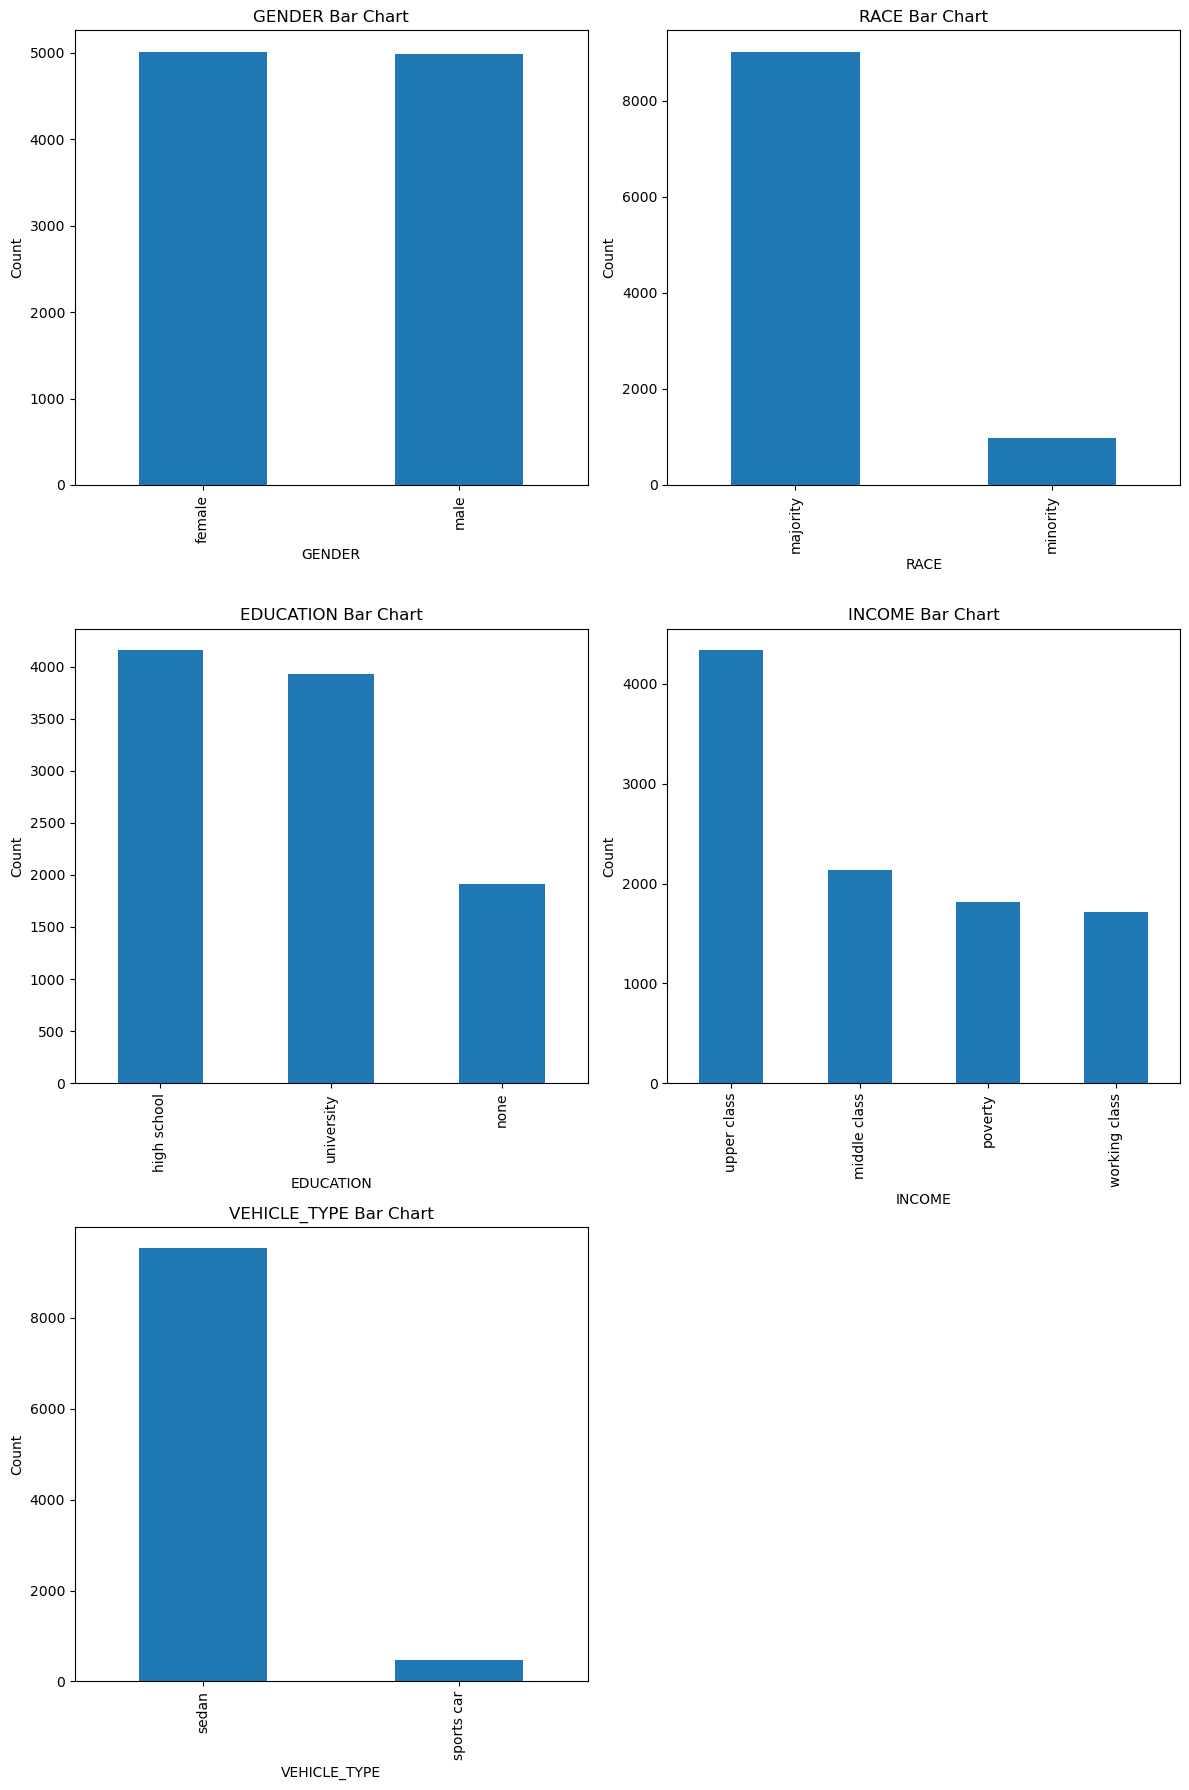

In [16]:
# bar charts
categorical_columns = ['GENDER', 'RACE', 'EDUCATION','INCOME', 'VEHICLE_TYPE']
num_categorical = len(categorical_columns)
num_rows = (num_categorical - 1) // 2 + 1
num_cols = 2
plt.figure(figsize=(12, 6 * num_rows))
for idx, column in enumerate(categorical_columns): 
    plt.subplot(num_rows, num_cols, idx + 1) 
    value_counts = car_insurance_df[column].value_counts() 
    value_counts.plot(kind='bar') 
    plt.title(column + " Bar Chart") 
    plt.xlabel(column)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

## 1.4 Exploring Numerical Variables

In [17]:
# summary statistics of numerical variables

summary_stats = car_insurance_df.describe()
summary_stats

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


## Outlier Analysis with Visualization

### Histogram

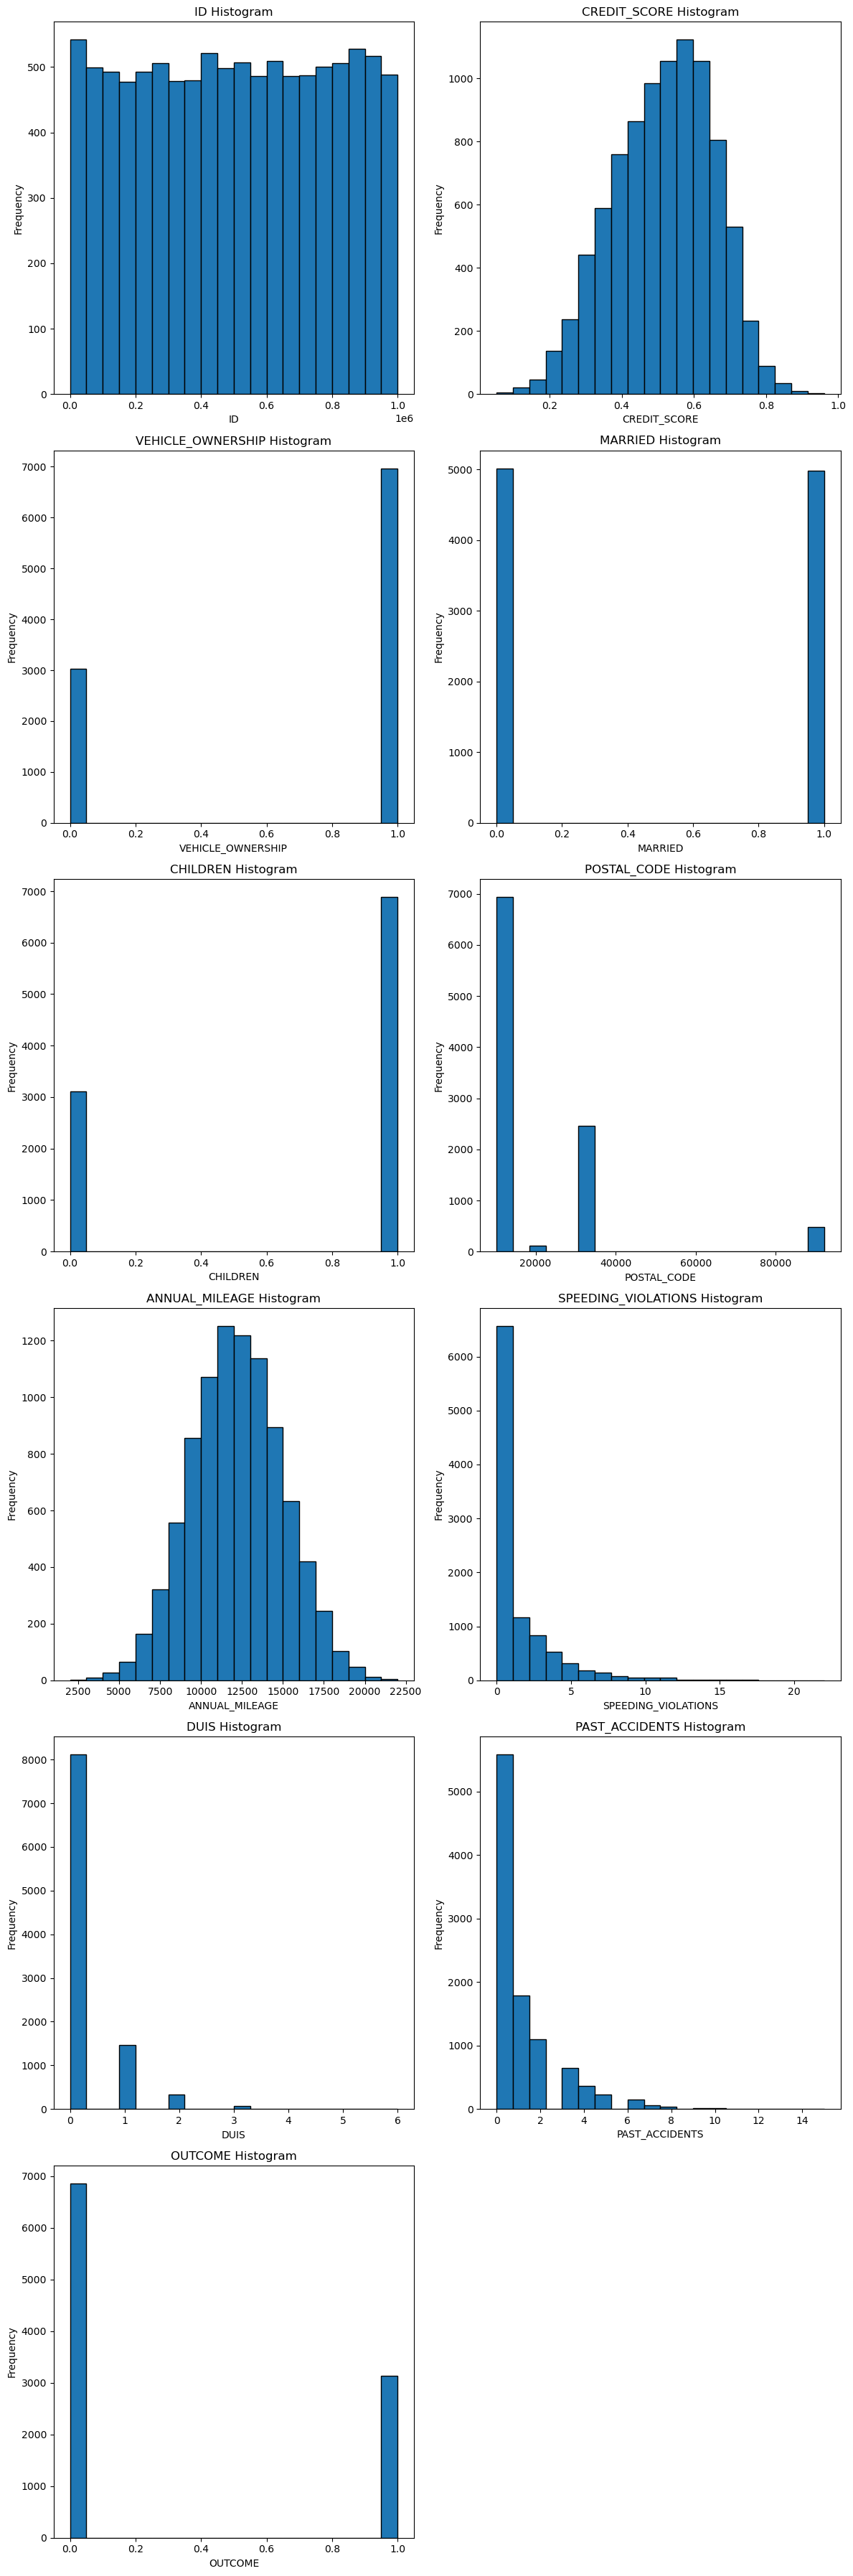

In [19]:
# histogram
numerical_columns = car_insurance_df.select_dtypes(include=['float64', 'int64']).columns
num_numerical = len(numerical_columns)
# number of rows and columns for subplots
num_rows = (num_numerical - 1) // 2 + 1
num_cols = 2
plt.figure(figsize=(12, 6 * num_rows))
for idx, column in enumerate(numerical_columns): 
    plt.subplot(num_rows, num_cols, idx + 1) 
    plt.hist(car_insurance_df[column], bins=20, edgecolor='k') 
    plt.title(column + " Histogram") 
    plt.xlabel(column)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### Box Plots

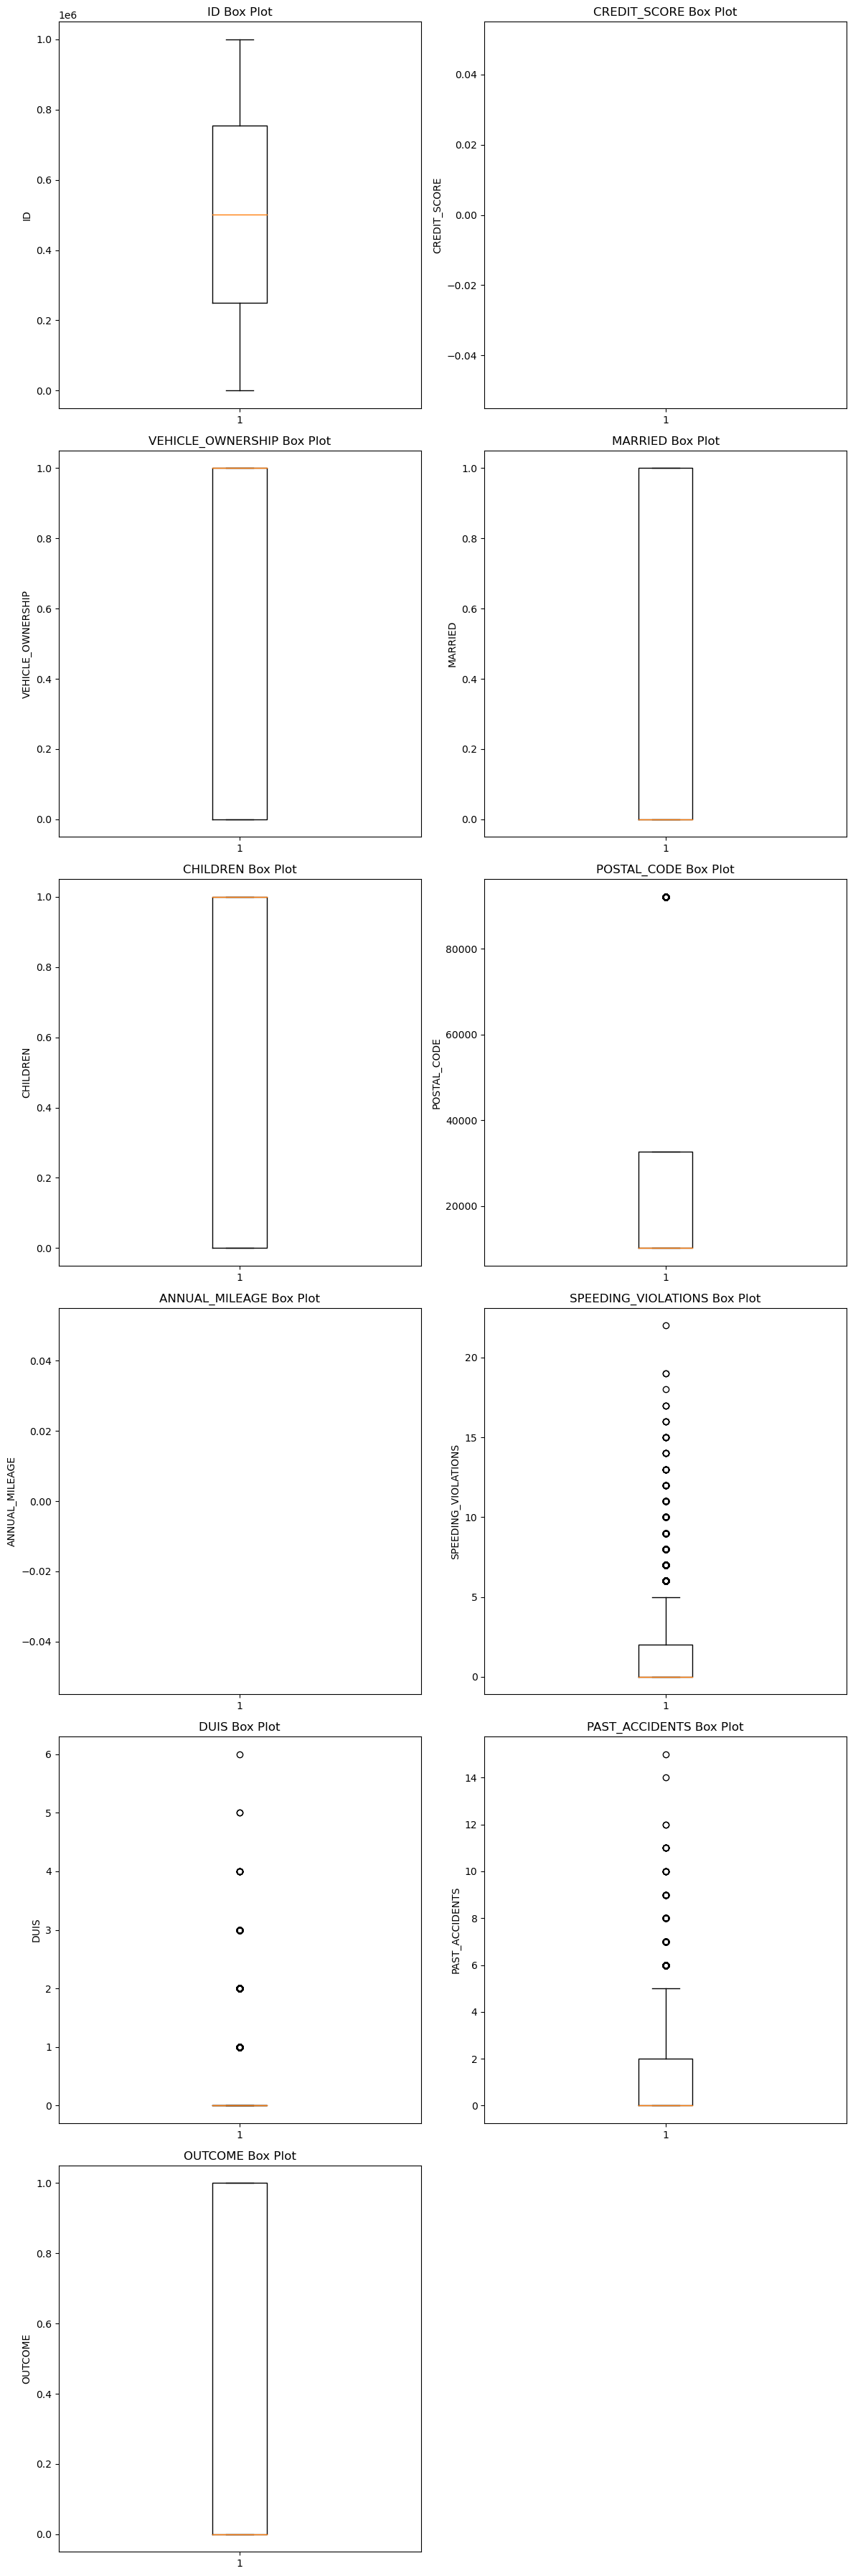

In [21]:
 # box plots
plt.figure(figsize=(12, 6 * num_rows))

for idx, column in enumerate(numerical_columns): 
    plt.subplot(num_rows, num_cols, idx + 1)
    plt.boxplot(car_insurance_df[column])
    plt.title(column + " Box Plot")
    plt.ylabel(column)
    
plt.tight_layout()
plt.show()

In [22]:
# correlation matrix

correlation_matrix = car_insurance_df.corr()
correlation_matrix

/var/folders/p1/cyxzhs3905n4sr201fghspdc0000gn/T/ipykernel_16321/1460513747.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = car_insurance_df.corr()


,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,1.000000,0.001704,0.009197,0.014826,0.001233,0.006038,-0.002217,0.008156,0.009268,0.001831,-0.010506
CREDIT_SCORE,0.001704,1.000000,0.312037,0.281238,0.220658,0.009040,-0.174453,0.204542,0.127366,0.180978,-0.325286
VEHICLE_OWNERSHIP,0.009197,0.312037,1.000000,0.175626,0.125990,-0.004866,-0.097433,0.133868,0.086567,0.119521,-0.378921
MARRIED,0.014826,0.281238,0.175626,1.000000,0.287009,0.012045,-0.462193,0.218855,0.120840,0.215269,-0.262104
CHILDREN,0.001233,0.220658,0.125990,0.287009,1.000000,0.020911,-0.447655,0.220415,0.115354,0.206295,-0.232835
POSTAL_CODE,0.006038,0.009040,-0.004866,0.012045,0.020911,1.000000,-0.133978,0.113686,0.038492,-0.116985,0.095889
ANNUAL_MILEAGE,-0.002217,-0.174453,-0.097433,-0.462193,-0.447655,-0.133978,1.000000,-0.323547,-0.116598,-0.195217,0.187154
SPEEDING_VIOLATIONS,0.008156,0.204542,0.133868,0.218855,0.220415,0.113686,-0.323547,1.000000,0.359838,0.443074,-0.291862
DUIS,0.009268,0.127366,0.086567,0.120840,0.115354,0.038492,-0.116598,0.359838,1.000000,0.259359,-0.189352
PAST_ACCIDENTS,0.001831,0.180978,0.119521,0.215269,0.206295,-0.116985,-0.195217,0.443074,0.259359,1.000000,-0.311495


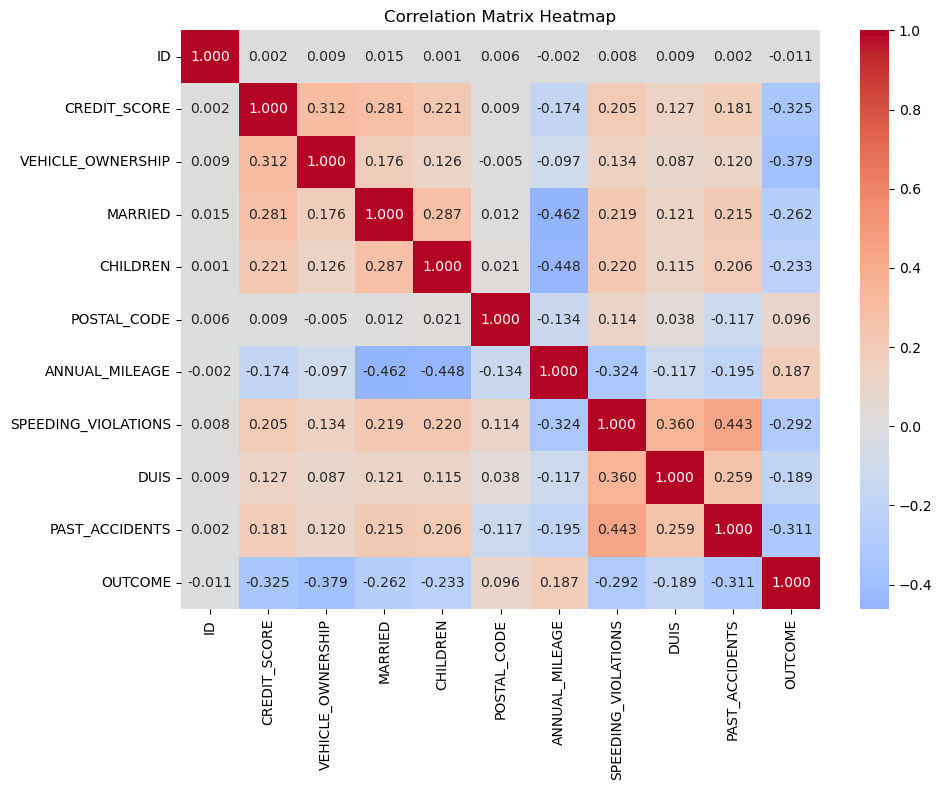

In [24]:
# heatmap of correlation matrix
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.3f') 

plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()